In [10]:
import illustris_python as il

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [11]:
base_path = "/Users/users/nastase/PROJECT/"

In [12]:
data_directory = "/Users/users/nastase/PROJECT/DATA/nexus_outputs/MMF_outputs/"

In [37]:
snapnum = 133

In [13]:
def tempfile_finder(snapnum):
    tempfile = f"/Users/users/nastase/PROJECT/DATA/nexus_outputs/MMF_outputs/output_{snapnum}.a_den"
    
    return tempfile

In [38]:
tempfile = tempfile_finder(snapnum)

## NEXUS+ MMF results

In [39]:
def readNEXUS(densityFile,gridsize=512,vel=False,velFile=None):
    # here we wish to extract the 3 digits corresponding ot the snapshot number, such that we can save the files
    # in the same directory without overwriting
    
    pattern = r'(\d{3})\.a_den$'
    
    # Search for the pattern in the densityFile name
    match = re.search(pattern, densityFile)
    
    if match:
        # Extract the 3 digits
        digits = match.group(1)
#         print("Extracted digits: {digits}")
    else:
        print("No matching digits found before '.a_den'")
    
    #This function will read the files generated by runNEXUS and make them into numpy arrays
    #It can also read DTFE velocity files as an extra option
    #The order is as follows, it returns:
    #Densityfield, NEXUS_nodes, NEXUS_filaments, NEXUS_walls, Velocity (optional)
    #The NEXUS arrays can then be used for contours or converted into boolean arrays
    #Where all cells > 0 are part of the corresponding structure
    #Voids are located where the other three components are all 0 
    shape = (gridsize,gridsize,gridsize)
    denfield = np.fromfile(densityFile,dtype=np.float32)
    denfield = np.reshape(denfield[262:-2],shape)
    MMFn = np.fromfile(f"{data_directory}node_{digits}_clean.MMF",dtype=np.int16)
    MMFn = np.reshape(MMFn[527:-1],shape)
    MMFf = np.fromfile(f"{data_directory}fila_{digits}_clean.MMF",dtype=np.int16)
    MMFf = np.reshape(MMFf[527:-1],shape)
    MMFw = np.fromfile(f"{data_directory}wall_{digits}_clean.MMF",dtype=np.int16)
    MMFw = np.reshape(MMFw[527:-1],shape)
    #Correct for the z-axis missallignment of the density field wrt NEXUS
    def maxmean(densf,MMFfila,axisn,ran):
        k = np.zeros(ran)
        for i in range(ran):
            k[i] = np.mean(np.roll(densf,i,axis=axisn)[MMFfila>0])
        return np.argmax(k)
    
    shift = maxmean(denfield,MMFf,2,gridsize)
    denfield = np.roll(denfield,shift,axis=2)
    if vel==True:
        velo = np.fromfile(velFile,dtype=np.float32)
        k = np.reshape(velo,(gridsize,gridsize,gridsize,3))
        k = np.roll(k,shift,axis=2)
        return denfield, MMFn, MMFf, MMFw, k
    else:
        return denfield, MMFn, MMFf, MMFw

In [ ]:
denfield, MMFn, MMFf, MMFw = readNEXUS(tempfile)

# Plotting

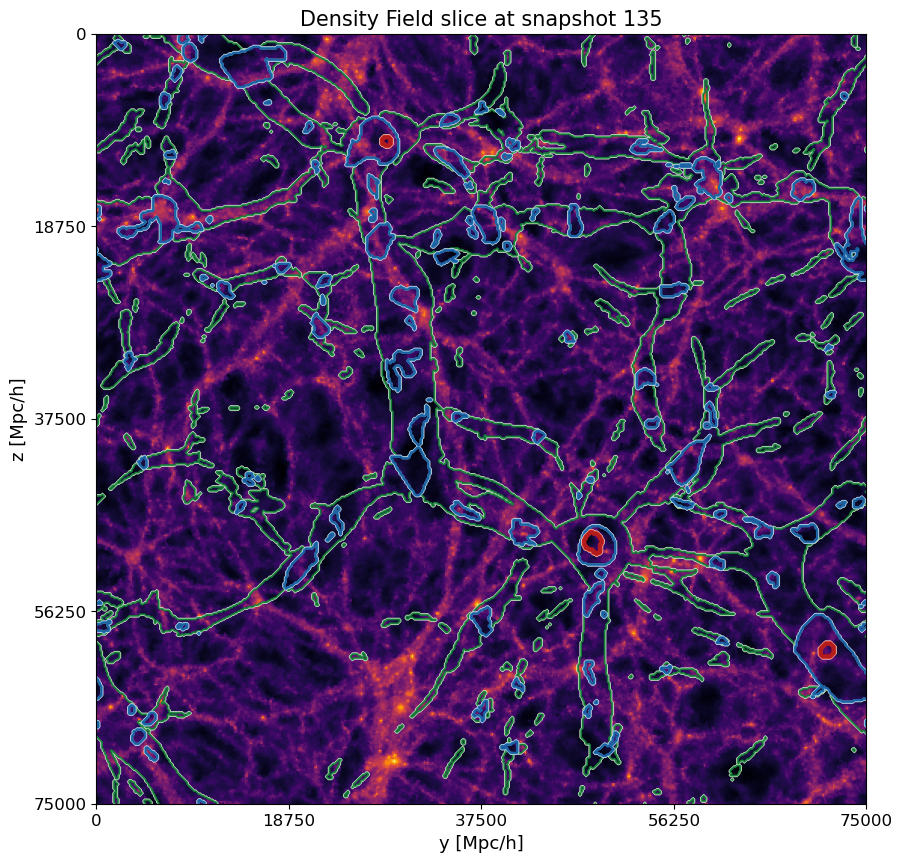

In [44]:
i2 = 200
sidelen = 106.5
gridsize = 512
fontsize = 13

x, y = np.meshgrid(np.linspace(0,sidelen,gridsize),np.linspace(0,sidelen,gridsize))
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.log(denfield[:,i2,:]),cmap="inferno",extent=[0,sidelen,sidelen,0])
plt.contour(x,y,MMFw[:,i2,:],levels=10,cmap="Greens",linewidths=1,alpha=0.5)
plt.contour(x,y,MMFf[:,i2,:],levels=10,cmap="Blues",linewidths=1.5,alpha=0.5)
plt.contour(x,y,MMFn[:,i2,:],levels=10,cmap="Reds",linewidths=3,alpha=0.5)
new_ticks = np.linspace(0, sidelen, 5)  # Positions on the original scale
rescaled_ticks = np.linspace(0, 75_000, 5)  # Rescaled tick labels

# Update tick settings to match the extent of the plot
plt.xticks(new_ticks, [f"{int(tick)}" for tick in rescaled_ticks])
plt.yticks(new_ticks, [f"{int(tick)}" for tick in rescaled_ticks])
plt.tick_params(axis='both', which='major', labelsize=12) 

plt.xlabel("y [Mpc/h]", fontsize=fontsize)
plt.ylabel("z [Mpc/h]", fontsize=fontsize)
plt.title(f"Density Field slice at snapshot {snapnum}", size=15)
plt.savefig(f"/Users/users/nastase/GitBub/Thesis/ResultsPaper/figures/slice_y200_{snapnum}")
plt.show()

In [ ]:
i2 = 105
sidelen = 106.5
gridsize = 512
fontsize = 13

x, y = np.meshgrid(np.linspace(0,sidelen,gridsize),np.linspace(0,sidelen,gridsize))
fig = plt.figure(figsize=(10,10))
im = plt.imshow(np.log(denfield[:,i2,:]),cmap="inferno",extent=[0,sidelen,sidelen,0])
plt.contour(x,y,MMFw[i2,:,:],levels=10,cmap="Greens",linewidths=1,alpha=0.5)
plt.contour(x,y,MMFf[i2,:,:],levels=10,cmap="Blues",linewidths=1.5,alpha=0.5)
plt.contour(x,y,MMFn[i2,:,:],levels=10,cmap="Reds",linewidths=3,alpha=0.5)
new_ticks = np.linspace(0, sidelen, 5)  # Positions on the original scale
rescaled_ticks = np.linspace(0, 75_000, 5)  # Rescaled tick labels

# Update tick settings to match the extent of the plot
plt.xticks(new_ticks, [f"{int(tick)}" for tick in rescaled_ticks])
plt.yticks(new_ticks, [f"{int(tick)}" for tick in rescaled_ticks])
plt.tick_params(axis='both', which='major', labelsize=12) 

plt.xlabel("y [Mpc/h]", fontsize=fontsize)
plt.ylabel("z [Mpc/h]", fontsize=fontsize)
plt.title(f"Density Field slice at snapshot {snapnum}", size=15)
plt.savefig(f"/Users/users/nastase/GitBub/Thesis/ResultsPaper/figures/slice_x102_{snapnum}")
plt.show()